# Explora aquí

Se recomienda utilizar este cuaderno con fines de exploración.

In [19]:
#importamos librerias
import os
from bs4 import BeautifulSoup
import requests
import time
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd



In [2]:
# creamos la variable con el link de la pagina
url = "https://en.wikipedia.org/wiki/List_of_most-streamed_songs_on_Spotify"
headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'}
# este headers se utiliza para que no salga error 403 al hacer la peticion, simulando ser un navegador web
response = requests.get(url, headers= headers)

if response.status_code == 200:
  print("La petición ha ido bien")
  soup = BeautifulSoup(response.text, "html.parser")
else:
  print("La petición ha ido mal")



La petición ha ido bien


In [3]:
# se identifica la estructura de la pagina
soup = BeautifulSoup(response.content)
soup

<!DOCTYPE html>

<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-custom-font-size-clientpref-1 vector-feature-appearance-pinned-clientpref-1 vector-feature-night-mode-enabled skin-theme-clientpref-day vector-sticky-header-enabled vector-toc-available" dir="ltr" lang="en">
<head>
<meta charset="utf-8"/>
<title>List of Spotify streaming records - Wikipedia</title>
<script>(function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-conten

In [4]:
# buscamos la tabla en la pagina
tabla = soup.find('table')
tabla

<table class="wikitable sortable plainrowheaders">
<tbody><tr>
<th>Rank
</th>
<th>Song
</th>
<th>Artist(s)
</th>
<th>Streams<br/>(billions)
</th>
<th>Release date
</th>
<th class="unsortable"><abbr title="References">Ref.</abbr>
</th></tr>
<tr>
<td style="text-align:center;">1
</td>
<th scope="row">"<a href="/wiki/Blinding_Lights" title="Blinding Lights">Blinding Lights</a>"
</th>
<td style="text-align:left;"><a href="/wiki/The_Weeknd" title="The Weeknd">The Weeknd</a></td>
<td style="text-align:center;">5.151</td>
<td style="text-align:right;"><span data-sort-value="000000002019-11-29-0000" style="white-space:nowrap">29 November 2019</span></td>
<td style="text-align:center;"><sup class="reference" id="cite_ref-1"><a href="#cite_note-1"><span class="cite-bracket">[</span>1<span class="cite-bracket">]</span></a></sup>
</td></tr>
<tr>
<td style="text-align:center;">2
</td>
<th scope="row">"<a href="/wiki/Shape_of_You" title="Shape of You">Shape of You</a>"
</th>
<td style="text-align:le

In [5]:
# tabla
datos_tabla = []
for fila in tabla.find_all('tr'):
    celdas = fila.find_all(['th', 'td'])
    # Extrae el texto de cada celda
    datos_fila = [celda.text.strip() for celda in celdas]
    if datos_fila: # Asegura que la fila no esté vacía
        datos_tabla.append(datos_fila)

In [6]:
print(datos_tabla)

[['Rank', 'Song', 'Artist(s)', 'Streams(billions)', 'Release date', 'Ref.'], ['1', '"Blinding Lights"', 'The Weeknd', '5.151', '29 November 2019', '[1]'], ['2', '"Shape of You"', 'Ed Sheeran', '4.655', '6 January 2017', '[2]'], ['3', '"Starboy"', 'The Weeknd and Daft Punk', '4.218', '21 September 2016', '[3]'], ['4', '"Sweater Weather"', 'The Neighbourhood', '4.196', '3 December 2012', '[4]'], ['5', '"Someone You Loved"', 'Lewis Capaldi', '4.138', '8 November 2018', '[5]'], ['6', '"As It Was"', 'Harry Styles', '4.128', '1 April 2022', '[6]'], ['7', '"Sunflower"', 'Post Malone and Swae Lee', '4.032', '18 October 2018', '[7]'], ['8', '"One Dance"', 'Drake with Wizkid and Kyla', '3.890', '5 April 2016', '[8]'], ['9', '"Stay"', 'The Kid Laroi and Justin Bieber', '3.728', '9 July 2021', '[9]'], ['10', '"Perfect"', 'Ed Sheeran', '3.722', '3 March 2017', '[10]'], ['11', '"Believer"', 'Imagine Dragons', '3.657', '1 February 2017', '[11]'], ['12', '"Heat Waves"', 'Glass Animals', '3.586', '29 J

In [7]:
import pandas as pd

data_df = pd.DataFrame(datos_tabla)
data_df

,0,1,2,3,4,5
0,Rank,Song,Artist(s),Streams(billions),Release date,Ref.
1,1,"""Blinding Lights""",The Weeknd,5.151,29 November 2019,[1]
2,2,"""Shape of You""",Ed Sheeran,4.655,6 January 2017,[2]
3,3,"""Starboy""",The Weeknd and Daft Punk,4.218,21 September 2016,[3]
4,4,"""Sweater Weather""",The Neighbourhood,4.196,3 December 2012,[4]
...,...,...,...,...,...,...
97,97,"""Someone Like You""",Adele,2.461,24 January 2011,
98,98,"""Levitating""",Dua Lipa and DaBaby,2.459,1 October 2020,[96]
99,99,"""Sad!""",XXXTentacion,2.459,2 March 2018,[97]
100,100,"""Payphone""",Maroon 5 and Wiz Khalifa,2.449,16 April 2012,


In [8]:
#informacion del dataframe
print("Dimensiones del DataFrame:", data_df.shape)
data_df.head

Dimensiones del DataFrame: (102, 6)


<bound method NDFrame.head of                           0                   1                         2  \
0                      Rank                Song                 Artist(s)   
1                         1   "Blinding Lights"                The Weeknd   
2                         2      "Shape of You"                Ed Sheeran   
3                         3           "Starboy"  The Weeknd and Daft Punk   
4                         4   "Sweater Weather"         The Neighbourhood   
..                      ...                 ...                       ...   
97                       97  "Someone Like You"                     Adele   
98                       98        "Levitating"       Dua Lipa and DaBaby   
99                       99              "Sad!"              XXXTentacion   
100                     100          "Payphone"  Maroon 5 and Wiz Khalifa   
101  As of 24 November 2025                None                      None   

                     3                  4    

In [9]:
#miramos los tipos de datos
data_df.dtypes

0    object
1    object
2    object
3    object
4    object
5    object
dtype: object

In [10]:
#miramos si hay celdas nulas
data_df.isnull().sum()


0    0
1    1
2    1
3    1
4    1
5    1
dtype: int64

In [11]:
#eliminamos filas nulas
data_df = data_df.replace('\n', '', regex=True)

In [12]:
#crear una tabla nueva en sqlite
conn = sqlite3.connect('songs.db')
data_df.to_sql('tabla1_songs', conn, if_exists='replace', index=False)
conn.close()    

In [13]:
print(conn)
data_df

,0,1,2,3,4,5
0,Rank,Song,Artist(s),Streams(billions),Release date,Ref.
1,1,"""Blinding Lights""",The Weeknd,5.151,29 November 2019,[1]
2,2,"""Shape of You""",Ed Sheeran,4.655,6 January 2017,[2]
3,3,"""Starboy""",The Weeknd and Daft Punk,4.218,21 September 2016,[3]
4,4,"""Sweater Weather""",The Neighbourhood,4.196,3 December 2012,[4]
...,...,...,...,...,...,...
97,97,"""Someone Like You""",Adele,2.461,24 January 2011,
98,98,"""Levitating""",Dua Lipa and DaBaby,2.459,1 October 2020,[96]
99,99,"""Sad!""",XXXTentacion,2.459,2 March 2018,[97]
100,100,"""Payphone""",Maroon 5 and Wiz Khalifa,2.449,16 April 2012,


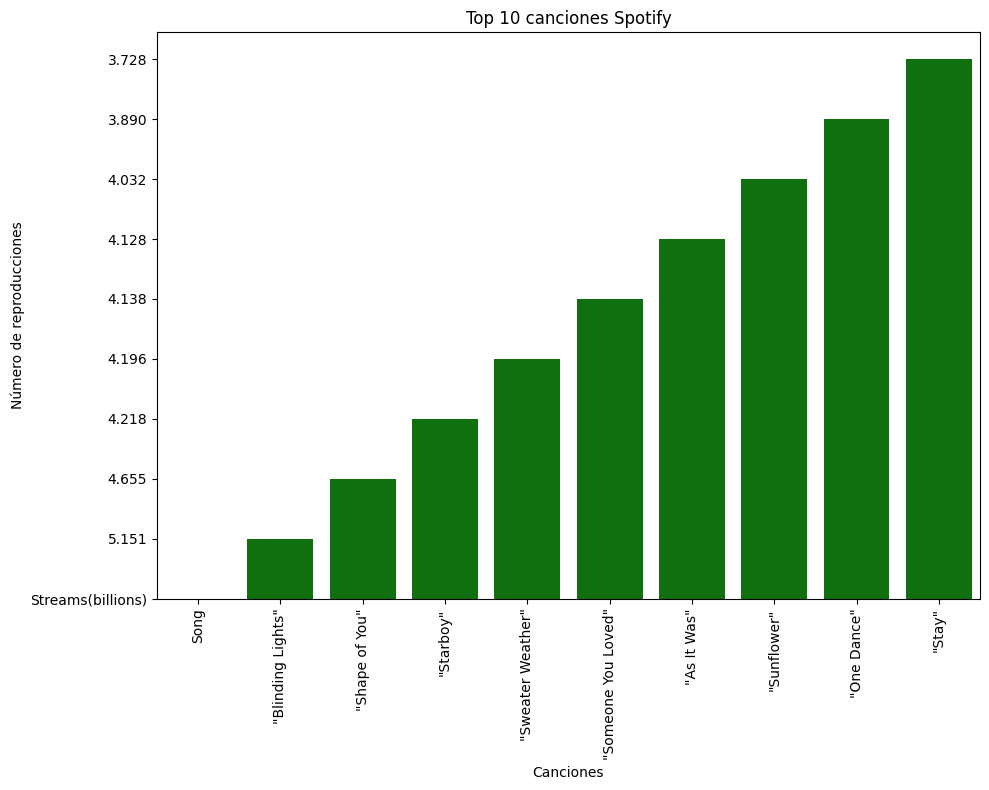

In [14]:
# visualizacion de datos _ lo hice con IA, ya que me daba los ejes al reves y los nombres
plt.figure(figsize=(10,8))
sns.barplot(x=data_df[1].head(10), y=data_df[3].head(10), color='green')
plt.title('Top 10 canciones Spotify')
plt.ylabel('Número de reproducciones')
plt.xlabel('Canciones')
plt.xticks(rotation=90, fontsize=10)  # 90 grados vertical
plt.gca().invert_yaxis()  # Invierte para que la primera canción esté arriba
plt.tight_layout()
plt.show()

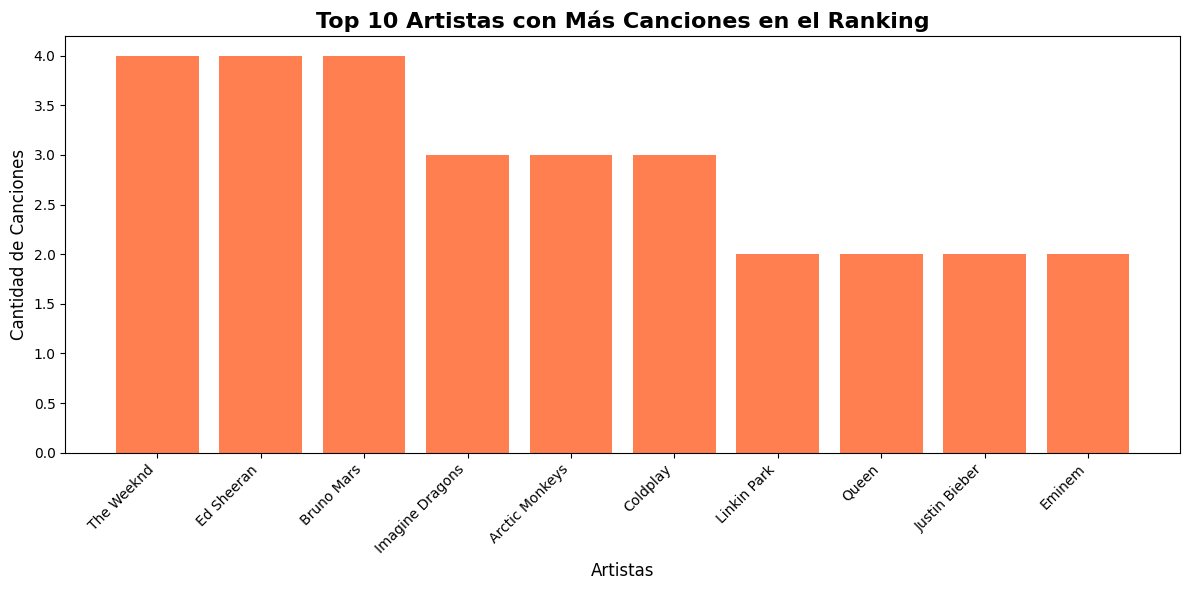

In [15]:
# Top 10 artistas con más canciones en el ranking
plt.figure(figsize=(12, 6))

artistas= data_df.iloc[:, 2].value_counts().head(10)
plt.bar(range(len(artistas)), artistas.values, color='coral')
plt.title('Top 10 Artistas con Más Canciones en el Ranking', fontsize=16, fontweight='bold')
plt.xlabel('Artistas', fontsize=12)
plt.ylabel('Cantidad de Canciones', fontsize=12)
plt.xticks(range(len(artistas)), artistas.index, rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [16]:
# grafico de scatter plot de reproducciones vs año de lanzamiento
# primero limpiamos los datos para quedarnos solo con el año
data_df[4] = data_df[4].str.extract(r'(\d{4})')  # Extrae solo el año de la columna
data_df[4] = pd.to_numeric(data_df[4], errors='coerce')  # Convierte a numérico, NaN si no es posible

In [21]:
# eliminar filas con valores NaN en las columnas relevantes
data_df = data_df.dropna(subset=[3, 4])

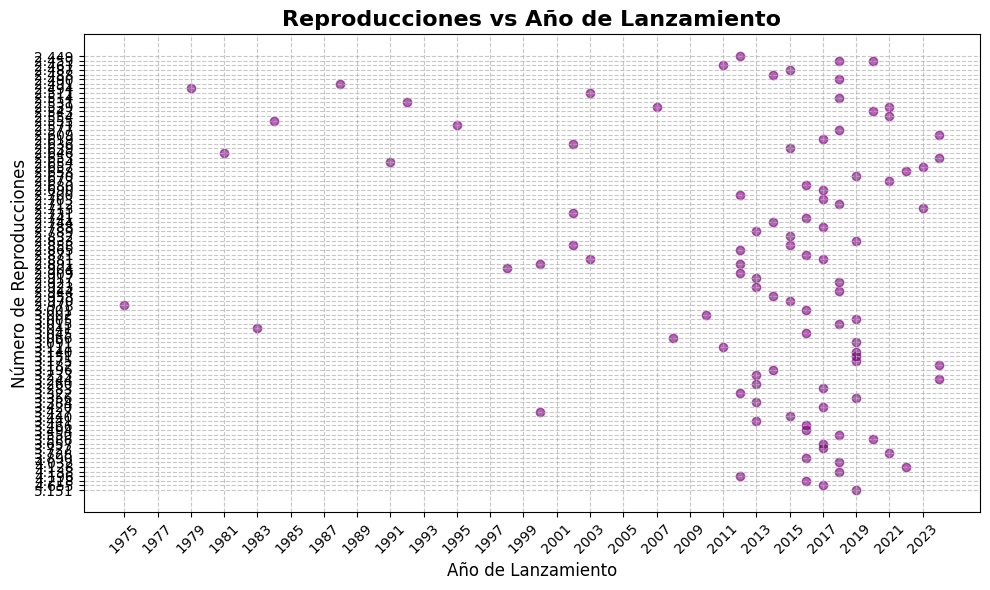

In [22]:
# grafico scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(data_df[4], data_df[3].str.replace(',', ''), color='purple', alpha=0.6)
plt.title('Reproducciones vs Año de Lanzamiento', fontsize=16, fontweight='bold')
plt.xlabel('Año de Lanzamiento', fontsize=12)
plt.ylabel('Número de Reproducciones', fontsize=12)
plt.xticks(range(int(data_df[4].min()), int(data_df[4].max())+1, 2), rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()